# Case RNN

In [ ]:
!pip install -q Keras

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LSTM
from keras import backend as K
from keras.utils import to_categorical


Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
def plot_images(images, labels):
    fig, axes = plt.subplots(5,5)
    fig.subplots_adjust(hspace = 0.5,wspace = 0.5)
    
    for i,ax in zip(np.random.choice(range(images.shape[0]),25),axes.flat):
        ax.imshow(images[i].reshape(28,28),cmap='binary')
        ax.set_xlabel('label :{}'.format(labels[i]))
        ax.set_xticks([])
        ax.set_yticks([])

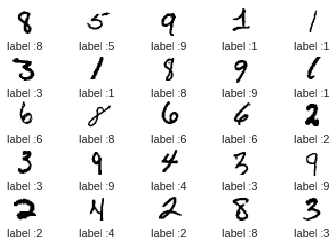

In [6]:
plot_images(X_train,y_train)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 30
img_rows, img_cols = 28, 28
n_neurons = 52

In [8]:
# X_train = X_train.reshape((X_train.shape[0], img_rows , img_cols, 1))
# X_test =  X_test.reshape((X_test.shape[0] , img_rows , img_cols, 1))


# Scale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train images : {}'.format(X_train.shape))
print('Test images : {}'.format(X_test.shape))
print('Train labels : {}'.format(y_train.shape))
print('Test labes : {}'.format(y_test.shape))

Train images : (60000, 28, 28)
Test images : (10000, 28, 28)
Train labels : (60000, 10)
Test labes : (10000, 10)


# Model

In [9]:
input_shape = (img_rows, img_cols)
model = Sequential()
model.add(LSTM(n_neurons, input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))


# Compute loss and update
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.SGD(lr=0.5),
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 52)                16848     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                530       
Total params: 17,378
Trainable params: 17,378
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs,
          verbose=1,)

Epoch 1/30
60000/60000 [==============================] - 32s 529us/step - loss: 0.8126 - acc: 0.7271
Epoch 2/30
34176/60000 [================>.............] - ETA: 12s - loss: 0.1951 - acc: 0.942460000/60000 [==============================] - 30s 499us/step - loss: 0.1771 - acc: 0.9474
Epoch 3/30
54656/60000 [==========================>...] - ETA: 2s - loss: 0.1191 - acc: 0.964860000/60000 [==============================] - 30s 503us/step - loss: 0.1183 - acc: 0.9652
Epoch 4/30
60000/60000 [==============================] - 30s 502us/step - loss: 0.0906 - acc: 0.9735
Epoch 5/30
 3072/60000 [>.............................] - ETA: 28s - loss: 0.0874 - acc: 0.973660000/60000 [==============================] - 30s 503us/step - loss: 0.0775 - acc: 0.9771
Epoch 6/30
41344/60000 [===================>..........] - ETA: 9s - loss: 0.0676 - acc: 0.98060000/60000 [==============================] - 30s 500us/step - loss: 0.0661 - acc: 0.9807
Epoch 7/30
59008/60000 [============================>.]

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09926832623634255
Test accuracy: 0.9758
